In [1]:
import pymolzilla.processing as pm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
  


import numdifftools as nd

In [2]:
plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

In [12]:
f = pm.cofe_room_t()
f.df.drop(7,inplace=True)
f.load()
f.preprocess()
f.process()

loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8
processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8


In [29]:
f.analyze()

analyzing set: 0
analyzing set: 1
analyzing set: 2
analyzing set: 3
analyzing set: 4
analyzing set: 5
analyzing set: 6
analyzing set: 7
analyzing set: 8
postprocessing


In [34]:
for ff in f:
    print(ff.fit_anisotropy.results.x)

[-0.65658877 -1.80991273 -4.18112314  1.10526313]
[ 2.37045166 -3.65728936 -3.84999323  0.89897399]
[ 2.81027739 -3.35295872 -3.99329563  0.86902874]
[ 2.78026991 -3.29513344 -4.01119824  0.8925873 ]
[ 2.85736073 -3.47460987 -3.98123045  0.87310308]
[ 2.99436183 -3.62410899 -3.99837316  0.85640948]
[ 2.65322756 -3.17214915 -3.90864194  0.91465637]
[ 2.51152853 -2.93081971 -3.95947577  0.91212154]
[ 2.96677138 -3.47964089 -3.96594922  0.89427202]


In [43]:
ex1 = [1.7*2,3.7*2]
ey1 = [-4.4*2,-2.4*2]

x1 = np.linspace(*ex1,20)
y1 = np.linspace(*ey1,20)
xx1, yy1 = np.meshgrid(x1, y1)

In [44]:
def g1(x,y,num):
    k = f[num].fit_anisotropy.results.x
    return f[num].fit_anisotropy.obj([x/2,y/2,k[2],k[3]])
def g2(x,y,num):
    k = f[num].fit_anisotropy.results.x
    return f[num].fit_anisotropy.obj([k[0],k[1],x/8,x/8])

In [89]:
def pl1(num, ax, label='', c='red', ax2=None):
    ssr = f[num].fit_anisotropy.obj(f[num].fit_anisotropy.results.x)
    dof = 25
    level = ssr*(1+4./dof)
    zz1 = np.vectorize(g1)(xx1,yy1,num)
    CS = ax.contour(xx1,yy1,zz1, levels=[level], colors=c)
    plt.clabel(CS)
    CS.collections[0].set_label(label)
    if ax2 is not None:
        ax2.imshow(zz1, origin='lower', extent=ex1+ey1)

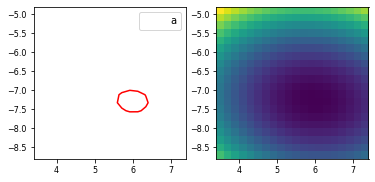

In [91]:
fig, (ax1, ax2) = plt.subplots(1,2)
pl1(5, ax1, 'a', ax2=ax2)
ax1.set_aspect(1)
ax1.legend()

In [57]:
f.df

,set,obj,wavelength,flags,sample_rotation,hext,k_canon
0,0460,<pymolzilla.processing.file_import.SetRotmld o...,460,None,0,207,"{'ku': 3.8506585938059725, 'phiu': -54.9697204..."
1,0530,<pymolzilla.processing.file_import.SetRotmld o...,530,None,0,207,"{'ku': 8.716606344565426, 'phiu': -28.52546785..."
2,0620,<pymolzilla.processing.file_import.SetRotmld o...,620,None,0,207,"{'ku': 8.749855130335382, 'phiu': -25.01599684..."
3,0710,<pymolzilla.processing.file_import.SetRotmld o...,710,None,0,207,"{'ku': 8.62271539054159, 'phiu': -24.921994787..."
4,0810,<pymolzilla.processing.file_import.SetRotmld o...,810,None,0,207,"{'ku': 8.99720491752089, 'phiu': -25.283839708..."
5,0920,<pymolzilla.processing.file_import.SetRotmld o...,920,None,0,207,"{'ku': 9.402205845749439, 'phiu': -25.21766348..."
6,1050,<pymolzilla.processing.file_import.SetRotmld o...,1050,None,0,207,"{'ku': 8.270948369740944, 'phiu': -25.04522133..."
8,1200,<pymolzilla.processing.file_import.SetRotmld o...,1200,None,0,207,"{'ku': 7.719450677664465, 'phiu': -24.70274886..."
9,1450,<pymolzilla.processing.file_import.SetRotmld o...,1450,None,0,207,"{'ku': 9.145410457767513, 'phiu': -24.77440414..."
